Question Number 1: Data Exploration of tandem data
About Dataset: Trip Duration (seconds) , Start Time and Date , End Time and Date ,
Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End
Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID ,
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) ,
Member Year of Birth, Member Gender
a. Read the entire dataset using pandas dataframe and build the file by appending
each file in an optimized manner
b. What was the time duration for the average trip taken? (Use plotting techniques and
write your observations for the same.)
c. Is there any correlation between the months and the trip duration? Use scatter plot
and comment your observations from the plot
d. Do seasons affect the duration of a trip ? Comment your observations.
e. Using multivariate exploration,explain whether there is any relation between short
trips and the users.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df1=pd.read_csv('201812-fordgobike-tripdata.csv')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131363 entries, 0 to 131362
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             131363 non-null  int64  
 1   start_time               131363 non-null  object 
 2   end_time                 131363 non-null  object 
 3   start_station_id         131171 non-null  float64
 4   start_station_name       131171 non-null  object 
 5   start_station_latitude   131363 non-null  float64
 6   start_station_longitude  131363 non-null  float64
 7   end_station_id           131171 non-null  float64
 8   end_station_name         131171 non-null  object 
 9   end_station_latitude     131363 non-null  float64
 10  end_station_longitude    131363 non-null  float64
 11  bike_id                  131363 non-null  int64  
 12  user_type                131363 non-null  object 
 13  member_birth_year        126352 non-null  float64
 14  memb

In [4]:
df2=pd.read_csv('201811-fordgobike-tripdata.csv')
print(df2.head())

   duration_sec                start_time                  end_time  \
0         79489  2018-11-30 13:40:32.7690  2018-12-01 11:45:21.9720   
1         42847  2018-11-30 20:13:45.5090  2018-12-01 08:07:53.1330   
2          1128  2018-11-30 23:58:26.4310  2018-12-01 00:17:14.4880   
3          2476  2018-11-30 23:35:06.7230  2018-12-01 00:16:23.4740   
4          1273  2018-11-30 23:54:12.3890  2018-12-01 00:15:26.3680   

   start_station_id                                 start_station_name  \
0               NaN                                                NaN   
1              37.0                                2nd St at Folsom St   
2             249.0                          Russell St at College Ave   
3             104.0                                  4th St at 16th St   
4              44.0  Civic Center/UN Plaza BART Station (Market St ...   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.420000              -121.940000        

In [5]:
df3=pd.read_csv('201807-fordgobike-tripdata.csv')
print(df3.head())

   duration_sec                start_time                  end_time  \
0         59989  2018-07-31 18:20:32.7230  2018-08-01 11:00:22.1890   
1         60232  2018-07-31 17:24:26.2350  2018-08-01 10:08:18.7520   
2         43864  2018-07-31 21:03:26.7030  2018-08-01 09:14:30.8340   
3         51522  2018-07-31 18:54:23.7210  2018-08-01 09:13:06.6610   
4         83380  2018-07-31 09:22:29.1000  2018-08-01 08:32:09.2700   

   start_station_id           start_station_name  start_station_latitude  \
0             197.0  El Embarcadero at Grand Ave               37.808848   
1              77.0         11th St at Natoma St               37.773507   
2               NaN                          NaN               37.410000   
3             114.0   Rhode Island St at 17th St               37.764478   
4             213.0        32nd St at Adeline St               37.823847   

   start_station_longitude  end_station_id             end_station_name  \
0              -122.249680           181.

In [6]:
df4=pd.read_csv('201803-fordgobike-tripdata.csv')
print(df4.head())

   duration_sec                start_time                  end_time  \
0         71766  2018-03-31 16:58:33.1490  2018-04-01 12:54:39.2630   
1         62569  2018-03-31 19:03:35.9160  2018-04-01 12:26:25.0350   
2         56221  2018-03-31 20:13:13.5640  2018-04-01 11:50:14.8400   
3         85844  2018-03-31 11:28:07.6580  2018-04-01 11:18:52.6130   
4          1566  2018-03-31 23:37:56.6400  2018-04-01 00:04:02.8930   

   start_station_id            start_station_name  start_station_latitude  \
0                 4   Cyril Magnin St at Ellis St               37.785881   
1                78           Folsom St at 9th St               37.773717   
2               258   University Ave at Oxford St               37.872355   
3               186        Lakeside Dr at 14th St               37.801319   
4               193  Grand Ave at Santa Clara Ave               37.812744   

   start_station_longitude  end_station_id               end_station_name  \
0              -122.408915       

In [7]:
df=pd.concat([df1, df2, df3, df4], ignore_index=True,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576102 entries, 0 to 576101
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             576102 non-null  int64  
 1   start_time               576102 non-null  object 
 2   end_time                 576102 non-null  object 
 3   start_station_id         572242 non-null  float64
 4   start_station_name       572242 non-null  object 
 5   start_station_latitude   576102 non-null  float64
 6   start_station_longitude  576102 non-null  float64
 7   end_station_id           572242 non-null  float64
 8   end_station_name         572242 non-null  object 
 9   end_station_latitude     576102 non-null  float64
 10  end_station_longitude    576102 non-null  float64
 11  bike_id                  576102 non-null  int64  
 12  user_type                576102 non-null  object 
 13  member_birth_year        544529 non-null  float64
 14  memb

In [8]:
# Convert Start Time and End Time to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

Average trip duration: 834.4304272507298 seconds


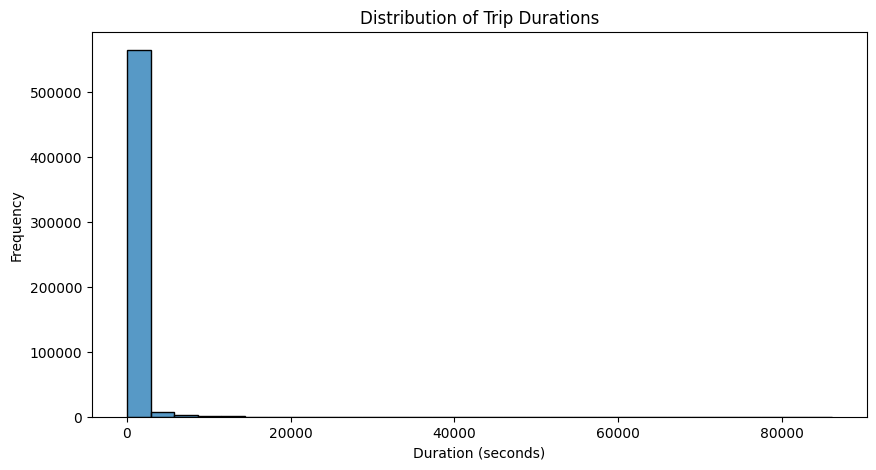

In [9]:
# b. What was the time duration for the average trip taken?
average_trip_duration = df['duration_sec'].mean()
print(f'Average trip duration: {average_trip_duration} seconds')

# Plotting the average trip duration
plt.figure(figsize=(10,5))
sns.histplot(df['duration_sec'], bins=30)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

Correlation between month and trip duration: -0.023595314737475965


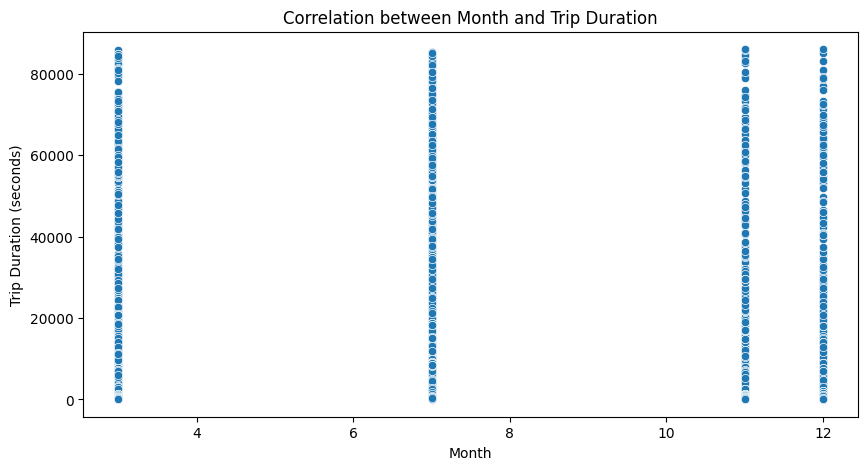

In [10]:
# c. Is there any correlation between the months and the trip duration?
df['Month'] = df['start_time'].dt.month
correlation = df[['Month', 'duration_sec']].corr()
print(f'Correlation between month and trip duration: {correlation.iloc[0,1]}')

# Scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x='Month', y='duration_sec', data=df)
plt.title('Correlation between Month and Trip Duration')
plt.xlabel('Month')
plt.ylabel('Trip Duration (seconds)')
plt.show()

In [11]:
# d. Do seasons affect the duration of a trip?
# Assuming 1-3: Winter, 4-6: Spring, 7-9: Summer, 10-12: Autumn
df['Season'] = pd.cut(df['Month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Autumn'])
season_duration = df.groupby('Season')['duration_sec'].mean()

print(season_duration)

Season
Winter    870.649899
Spring           NaN
Summer    907.710589
Autumn    764.248288
Name: duration_sec, dtype: float64


C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_8172\3969986075.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_duration = df.groupby('Season')['duration_sec'].mean()


member_gender  Female    Male  Other
Trip Type                           
Long            36867   77602   2076
Short           96965  324545   6551


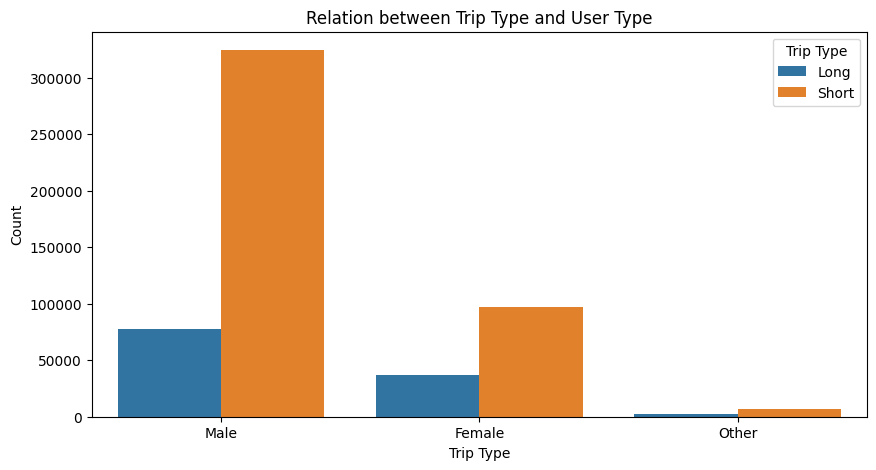

In [13]:
# e. Using multivariate exploration, explain whether there is any relation between short trips and the users.
# Assuming trips less than 15 minutes are short trips
df['Trip Type'] = df['duration_sec'].apply(lambda x: 'Short' if x <= 900 else 'Long')
relation = df.groupby(['Trip Type', 'member_gender'])['bike_id'].count().unstack()
print(relation)

# Use seaborn to create a count plot with 'User Type' on the x-axis and 'Trip Type' as the hue
plt.figure(figsize=(10,5))
sns.countplot(x='member_gender', hue='Trip Type', data=df)
plt.title('Relation between Trip Type and User Type')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.show()

In [15]:
df['member_gender'].unique()

array([nan, 'Male', 'Female', 'Other'], dtype=object)